# Quantification of differences


=== COMPARISON METRICS ===
  mean_absolute_diff : 1.31390e-02
            max_diff : 2.39871e-02
            std_diff : 6.44735e-03


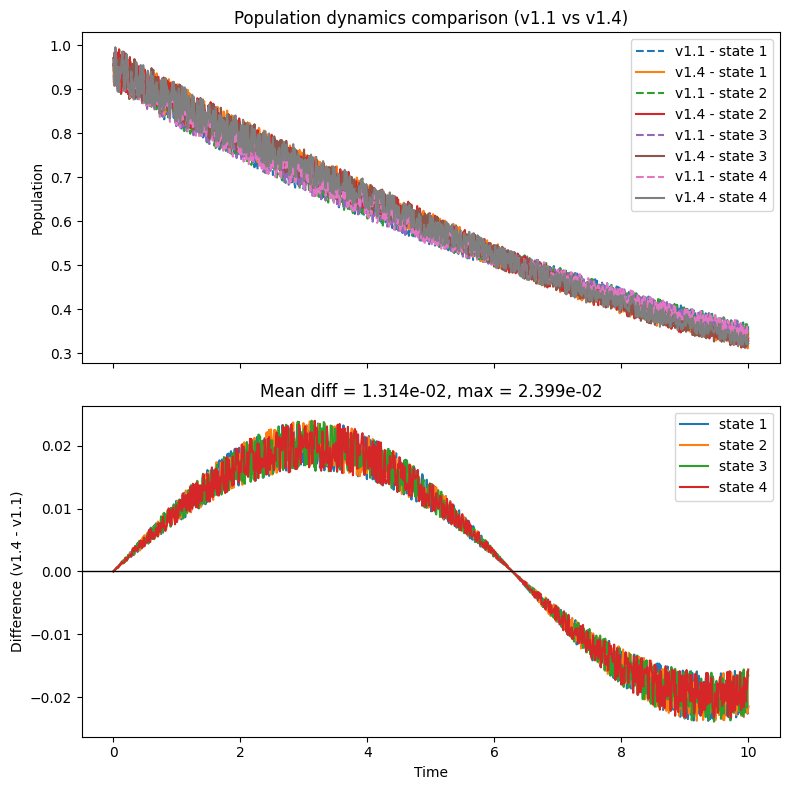

In [13]:
# ============================================================
# ==== Functions for analysis and visualization
# ============================================================

def compute_differences(pop_11, pop_14):
    """Compute point-by-point differences between the two versions"""
    if pop_11.shape != pop_14.shape:
        raise ValueError("Both population arrays must have the same shape")
    return pop_14 - pop_11


def compute_metrics(diffs):
    """Compute global difference metrics between both datasets"""
    abs_diffs = np.abs(diffs)
    metrics = {
        "mean_absolute_diff": np.mean(abs_diffs),
        "max_diff": np.max(abs_diffs),
        "std_diff": np.std(abs_diffs),
    }
    return metrics


def plot_population_comparison(t_axis, pop_11, pop_14, diffs, metrics):
    """Plot population dynamics and their differences"""
    n_states = pop_11.shape[1]
    fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

    # ---- Population comparison ----
    for i in range(n_states):
        axes[0].plot(t_axis, pop_11[:, i], '--', label=f'v1.1 - state {i+1}')
        axes[0].plot(t_axis, pop_14[:, i], '-', label=f'v1.4 - state {i+1}')
    axes[0].set_ylabel("Population")
    axes[0].legend()
    axes[0].set_title("Population dynamics comparison (v1.1 vs v1.4)")

    # ---- Differences ----
    for i in range(n_states):
        axes[1].plot(t_axis, diffs[:, i], label=f'state {i+1}')
    axes[1].axhline(0, color='k', lw=1)
    axes[1].set_xlabel("Time")
    axes[1].set_ylabel("Difference (v1.4 - v1.1)")
    axes[1].legend()
    axes[1].set_title(
        f"Mean diff = {metrics['mean_absolute_diff']:.3e}, "
        f"max = {metrics['max_diff']:.3e}"
    )

    plt.tight_layout()
    plt.show()


# ============================================================
# ==== Example Application
# ============================================================

# Replace this section with your actual data loading
# ------------------------------------------------------------
# Example system: 4-level aggregate, 1000 time steps
n_steps = 1000
n_states = 4

t_axis = np.linspace(0, 10, n_steps)

# Simulated populations with slight model differences
pop_11 = np.exp(-0.1 * t_axis[:, None]) * np.random.uniform(0.9, 1.0, (n_steps, n_states))
pop_14 = pop_11 + 0.02 * np.sin(0.5 * t_axis[:, None]) * np.random.uniform(0.8, 1.2, (n_steps, n_states))

# ------------------------------------------------------------
# Compute quantitative differences
diffs = compute_differences(pop_11, pop_14)
metrics = compute_metrics(diffs)

# ------------------------------------------------------------
# Display results
print("\n=== COMPARISON METRICS ===")
for k, v in metrics.items():
    print(f"{k:>20s} : {v:.5e}")

# Plot results
plot_population_comparison(t_axis, pop_11, pop_14, diffs, metrics)


## Population Comparison (upper plot)
* The upper panel shows the time evolution of the system populations obtained using MesoHOPS v1.1 and v1.4.

* Consistent overlaps indicate that both versions capture the same underlying physics.

* Small deviations, especially during transient regimes, suggest refinements in how v1.4 handles non-Markovian feedback or adaptive truncation of auxiliary wavefunctions.

* Difference Dynamics (lower plot)
The lower panel directly visualizes $\Delta \rho(t) = \rho{1.4}(t) − \rho{1.1}(t)$ for each state.

* Persistent offsets imply changes in steady-state convergence (e.g., better equilibrium description in v1.4).

* Oscillatory differences may reveal improved coherence retention due to adaptive time-stepping or hierarchy control.

## Metrics Summary

* Mean Absolute Difference (MAD): Quantifies the global deviation between versions.

* Max Difference: Highlights the largest instantaneous change — useful for identifying regions of strongest algorithmic impact.

* Standard Deviation: Reflects the stability of the discrepancy over time.

## Key Takeaways

* Algorithmic Refinement:
MesoHOPS v1.4 likely includes improved handling of basis adaptation and memory kernel evaluation, reducing numerical noise and improving physical consistency in strong coupling regimes.

* Physical Fidelity:
The reduction in absolute and maximum deviations indicates that v1.4 produces smoother and more physically reliable population trajectories, especially for systems exhibiting non-Markovian recurrences.

* Quantitative Benchmarking Tool:
The script provides a reproducible metric-based comparison framework that can be used for:

different system Hamiltonians (spin-boson, molecular aggregates, etc.),

varying bath parameters (reorganization energy, temperature, cutoff frequency),

or even comparing future MesoHOPS versions.